In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# You need at least the following python packages to run the script
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import dpc_suite as dpcs

In [2]:
# replace with the directory name that contains your data
base = '/Users/fzy/ORNL/Research/latex_nps_on_grating/240516_latex_nps_on_grating_HRSTEM_DPC/'

# replace with the root filename your saved your data
root_fn = str(base + '6C_12cmCL_40umC2_alpha1CA')

# Defines variables for the four detectors in layer 2 of the SAAF detector, you can do this same thing for layer 1 if you use layer 1
fn5 = str(root_fn + '_Ch5' + '.tif')
fn6 = str(root_fn + '_Ch6' + '.tif')
fn7 = str(root_fn + '_Ch7' + '.tif')
fn8 = str(root_fn + '_Ch8' + '.tif')
fn_scalebar = str(base + '6C_12cmCL_40umC2_alpha1CA_Ch1.bmp')

(256, 256, 3)


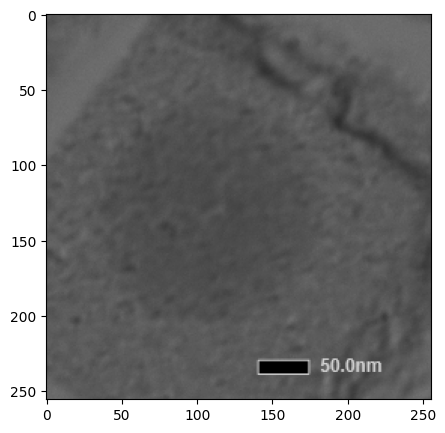

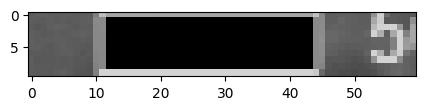

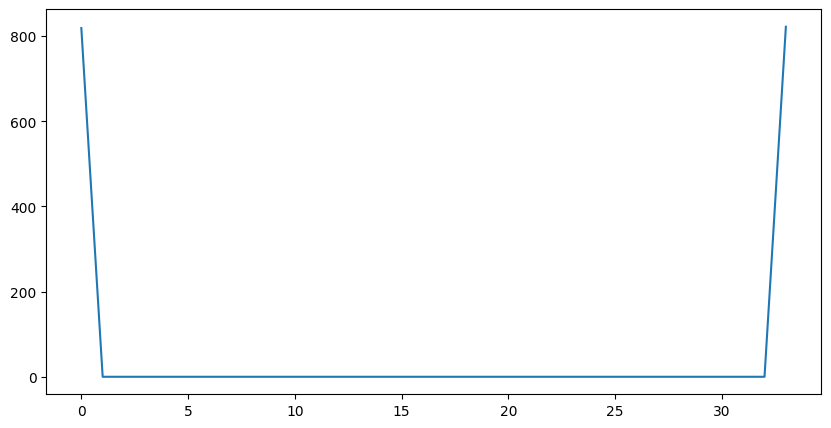

1.5625 400.0 1.5625


In [16]:
# Load the channel 1 image to determine the number of pixels contained in the scalebar
im = np.array(Image.open(fn_scalebar))

print(np.shape(im))
plt.figure(figsize=(5,5))
plt.imshow(im)
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(im[230:240,130:190]) # change the 
plt.show()


sb_lx = 142 #pixel location of left-hand-side of the scalebar in the plotted image
sb_rx = 174 #pixel location of right-hand-side of the scalebar in the plotted image

#Plot a line accross the scalebar to determine exact length of the scalebar
plt.figure(figsize=(10,5))
plt.plot(np.sum(im[232:238,sb_lx-1:sb_rx+1,0],axis=0))
plt.show()

sb_pix = sb_rx - sb_lx #pix measured length scalebar in pixels
sb_nm = 50 #nm length of scalebar on image in nm
pix = sb_nm / sb_pix #nm/pix
lenx_nm = pix * np.shape(im)[1]

print(pix, lenx_nm, 50/32)
#####################################
##### The .txt file says the 50 nm scalebar is 32, so you can also just use that
##### file to determine your scalebar length
#####################################

In [21]:
## For .tif data format
ch5 = np.array(Image.open(fn5),dtype=np.float32)
ch6 = np.array(Image.open(fn6),dtype=np.float32)
ch7 = np.array(Image.open(fn7),dtype=np.float32)
ch8 = np.array(Image.open(fn8),dtype=np.float32)

pix_new = lenx_nm/np.shape(ch6)[1] #nm/pix

1it [00:00,  1.36it/s]

ANGLE= (0, 0, 12)
[-0.643 -0.608 -0.605 ...  0.825  0.828  0.842] 0
[-0.643 -0.608 -0.605 ...  0.825  0.828  0.842] 1


M_STEP = 17


<Figure size 640x480 with 0 Axes>

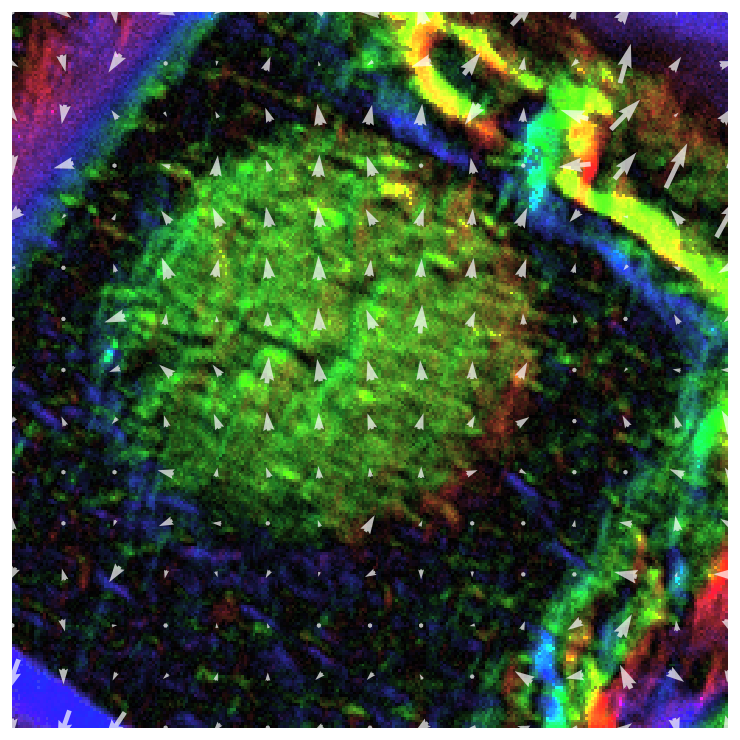

<Figure size 640x480 with 0 Axes>

In [70]:
dpcs.DPC_colormap_from_ABCD(A=ch5, B=ch6, C=ch7, D=ch8, #sv_fmt='pdf',
                           sv_file_name=str(base + 'colormap_test'),
                           im_w=1, arr_w=1/150, arr_scale=10, nm_pix=pix_new,
                           arrows=True, m_step=17, normalize=False,
                           intensity_scale=0,offset_angle=12, auto_remove_offset=False,
                           scalebar = False, magnetic=False, high_saturation=True, max_cutoff=0.4)


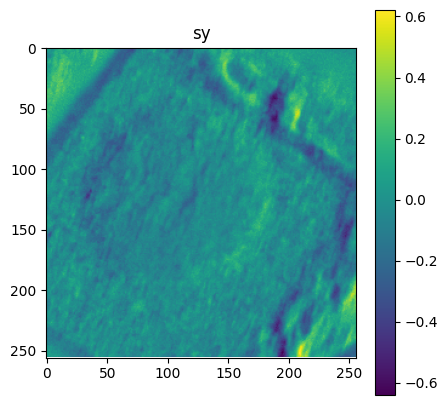

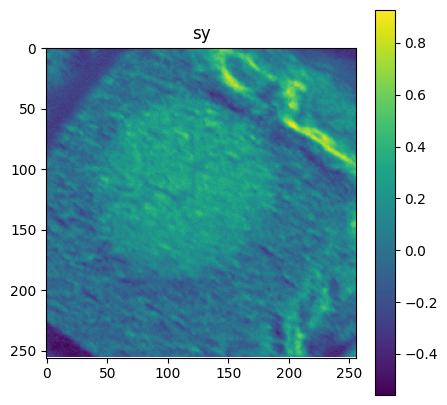

In [76]:
# If you want access to the x and y component of the fields, they are saved in your director with the
# '_sx.npy' and '_sy.npy' characters at the end of the file names. The following code loads these files
# into numpy arrays so you can view them or perform calculations. Note that the array is saved with size
# (nz, ny, nx). Because these images are not 3D image stacks, the first slice of the array is the
# desired 2D array.

sx = np.load(str(base + 'colormap_test_sx.npy'))[0]
sy = np.load(str(base + 'colormap_test_sy.npy'))[0]

plt.figure(figsize=(5,5))
plt.imshow(sx)
plt.title('sy')
plt.colorbar()
plt.show()

plt.figure(figsize=(5,5))
plt.imshow(sy)
plt.title('sy')
plt.colorbar()
plt.show()

1it [00:00,  1.29it/s]

ANGLE= (0, 0, 12)
[-0.643 -0.608 -0.605 ...  0.825  0.828  0.842] 0
[-0.643 -0.608 -0.605 ...  0.825  0.828  0.842] 1
M_STEP = 17


(256, 256) 1.5625 nm
SB_NM =  100


<Figure size 640x480 with 0 Axes>

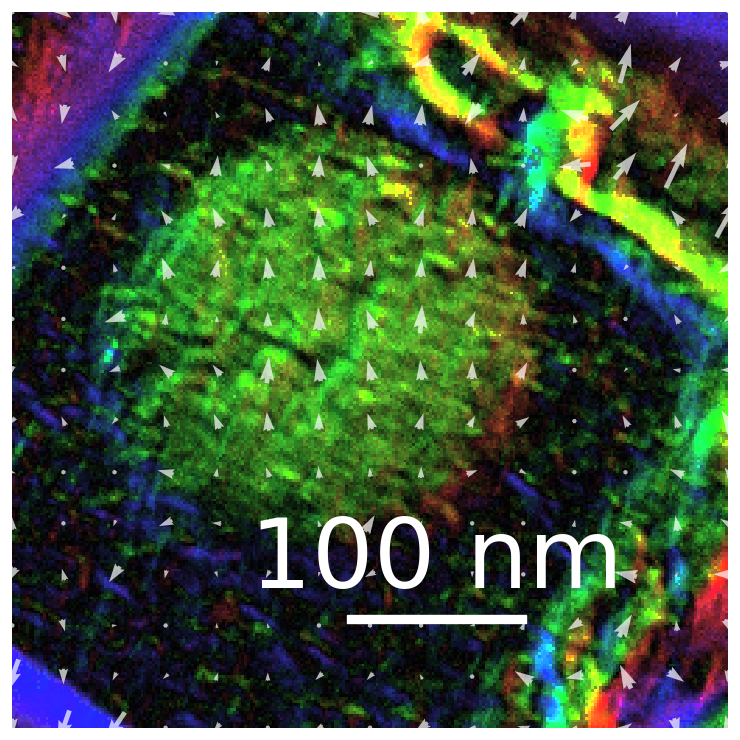

<Figure size 640x480 with 0 Axes>

In [78]:
# Finally, you may also find the following two functions useful:
s_norm = dpcs.calc_B_from_ABCD(A=ch5, B=ch6, C=ch7, D=ch8,
                               sv_file_name=str(base + 'colormap_test'),
                               auto_remove_offset=False,
                               magnetic=False, normalize=False)
# s_norm is the normalized field array with shape (3, nz, ny, nx), where the first dimension corresponds
# to the x, y, and z component of the field, respectively. Note that if the z-component is not specified,
# it is filled with zeros. sx = s_norm[0,0,:,:], sy = s_norm[1,0,:,:]
dpcs.plot_B_3D(b_arr = s_norm[:,0,::-1,:],#sv_fmt='jpg',
               sv_file_name=str(base + 'colormap_test'),
               im_w=1,arr_w=1/150,arr_scale=10, nm_pix=pix_new,
               arrows=True, m_step=17,normalize=False,
               offset_angle=12, scalebar = True,
               high_saturation=True, max_cutoff=0.4)